In [22]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        if 'No.' in df.columns:
            df.drop(columns=['No.'], inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df

sectors=fetch_sectors_names()
industry=fetch_industry_names()

sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1312,12.09T,0.17%,15.93,20.17%,0.28%,36.75%
1,Healthcare,1191,"7,973.87B",0.50%,63.84,2.94%,-0.93%,10.67%
2,Technology,805,22.25T,0.49%,48.20,14.32%,5.35%,50.76%
3,Industrials,687,"5,912.68B",1.19%,30.18,7.04%,-0.11%,25.16%
4,Consumer Discretionary,573,"8,941.80B",0.76%,30.17,6.46%,0.42%,36.89%
5,Materials,272,"2,061.34B",1.71%,28.37,6.24%,-0.62%,15.96%
6,Real Estate,264,"1,695.09B",3.84%,50.51,9.30%,-0.33%,19.36%
7,Communication Services,254,"7,019.84B",1.37%,31.18,11.68%,0.45%,40.62%
8,Energy,254,"3,652.96B",3.15%,13.62,8.07%,0.12%,12.99%
9,Consumer Staples,246,"4,297.51B",1.51%,26.14,5.64%,-0.95%,31.02%


# Bu kod, farklı sektörlerdeki hisse senetlerinin zaman serisi verilerini web scraping yöntemiyle çekerek, bir hissenin hangi sektöre daha çok benzediğini analiz etmek için verileri toplar ve işler.

In [23]:
sectors_df = fetch_sectors_names()
print("Sektörler:")
print(sectors_df.head())

industries_df = fetch_industry_names()
print("\nEndüstriler:")
print(industries_df.head())

financials_companies = fetch_data("financials")
print("\nFinans Sektöründeki Şirketler:")
print(financials_companies.head())

Sektörler:
              Sector Name  Stocks Market Cap Div. Yield  PE Ratio  \
0              Financials    1312     12.09T      0.17%     15.93   
1              Healthcare    1191  7,973.87B      0.50%     63.84   
2              Technology     805     22.25T      0.49%     48.20   
3             Industrials     687  5,912.68B      1.19%     30.18   
4  Consumer Discretionary     573  8,941.80B      0.76%     30.17   

  Profit Margin 1D Change 1Y Change  
0        20.17%     0.28%    36.75%  
1         2.94%    -0.93%    10.67%  
2        14.32%     5.35%    50.76%  
3         7.04%    -0.11%    25.16%  
4         6.46%     0.42%    36.89%  

Endüstriler:
               Industry Name  Stocks Market Cap Div. Yield PE Ratio  \
0              Biotechnology     672    879.15B      0.18%        -   
1           Asset Management     507  1,506.96B      5.75%    21.40   
2           Banks - Regional     352  1,638.21B      2.26%    13.17   
3     Software - Application     245  3,087.63B 

In [2]:
import yfinance as yf
financials_df = fetch_data("financials")
financials_data = yf.download(financials_df['Symbol'].tolist(), start="2005-01-01", end="2025-01-01", interval="1mo")['Close']
print(financials_data.head())
financials_data.to_csv('financialdata.csv')

[*********************100%***********************]  881 of 881 completed

25 Failed downloads:
['FGMC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-01-01)')
['PLUT', 'PLMK', 'SPHA', 'HSPT', 'DRDB', 'NOEM', 'DXF', 'CEPO', 'HVII', 'ASPC', 'JACS', 'MLAC', 'RANG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1735707600")')
['CRD.A', 'COLA', 'KFII', 'CRD.B', 'TDAC', 'JACS.RT', 'RIBB', 'AGM.A', 'SVCC', 'DMAA', 'BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price      Adj Close                                                 ...  \
Ticker         AGM.A ASPC BRK.B CEPO COLA CRD.A CRD.B DMAA DRDB DXF  ...   
Date                                                                 ...   
2005-01-01       NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN NaN  ...   
2005-02-01       NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN NaN  ...   
2005-03-01       NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN NaN  ...   
2005-04-01       NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN NaN  ...   
2005-05-01       NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN NaN  ...   

Price      Volume                                                    
Ticker         WU    WULF  XP XYF YHNA YOTA YRD ZBAI ZBAO      ZION  
Date                                                                 
2005-01-01    NaN   47800 NaN NaN  NaN  NaN NaN  NaN  NaN  11430200  
2005-02-01    NaN  222800 NaN NaN  NaN  NaN NaN  NaN  NaN   8483300  
2005-03-01    NaN   83400 NaN NaN  NaN  N

In [10]:
healthcare_df =	fetch_data("healthcare")
healthcare_data = yf.download(healthcare_df['Symbol'].tolist(), start="2005-01-01", end="2025-01-01", interval="1mo")['Close']
print(healthcare_data.head())
healthcare_data.to_csv('healthcaredata.csv')

[*********************100%***********************]  1163 of 1163 completed

308 Failed downloads:
['ZYBT', 'MAZE', 'MTSR', 'BBNX', 'RAIN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1735707600")')
['BIO.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-01-01)')
['NLSP', 'BCRX', 'SCPX', 'ENLV', 'RMTI', 'WRBY', 'AVNS', 'IRTC', 'ABOS', 'ETNB', 'CRON', 'NKTR', 'CALC', 'ZJYL', 'MOH', 'SILO', 'YCBD', 'TMDX', 'CLLS', 'LNSR', 'ABEO', 'BEAM', 'ENVB', 'TLSI', 'CADL', 'DYAI', 'QURE', 'PHVS', 'PRE', 'SHC', 'ONC', 'IRIX', 'TPST', 'NVS', 'TENX', 'TNFA', 'ELAB', 'ANVS', 'NSPR', 'AAPG', 'ITCI', 'TRVI', 'AADI', 'BDTX', 'IGMS', 'IPSC', 'EYEN', 'LGVN', 'RMD', 'BDSX', 'CELC', 'RCUS', 'MRVI', 'LCTX', 'PMVP', 'HCWB', 'ALGS', 'IQV', 'STRM', 'CVAC', 'ASRT', 'JAGX', 'TLRY', 'AKYA', 'XGN', 'HUM', 'NHC', 'RPTX', 'NXGL', 'CAPR',

Ticker              A  AADI  AAPG  ABBV  ABCL  ABEO  ABOS  ABP  ABSI  \
Date                                                                   
2005-01-01  13.322146   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2005-02-01  14.460945   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2005-03-01  13.376377   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2005-04-01  12.502697   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2005-05-01  14.466969   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   

Ticker            ABT  ...  ZNTL  ZOM  ZTEK  ZTS  ZURA  ZVRA  ZVSA  ZYBT  \
Date                   ...                                                 
2005-01-01  13.515775  ...   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   
2005-02-01  13.883659  ...   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   
2005-03-01  14.073850  ...   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   
2005-04-01  14.840640  ...   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   
2005-05-01  14.646986  ...   NaN  NaN  

In [12]:
technology_df= fetch_data("technology")
technology_df = technology_df.dropna(subset=['Symbol']) 
technology_df['Symbol'] = technology_df['Symbol'].astype(str) 
technology_data = yf.download(technology_df['Symbol'].tolist(), start="2005-01-01", end="2025-01-01", interval="1mo")['Close']
print(technology_data.head())
technology_data.to_csv('technology_data.csv')
all_data = pd.concat([financials_data, healthcare_data, technology_data], axis=1)
all_data.to_csv('all_data.csv')

[*********************100%***********************]  767 of 768 completed

101 Failed downloads:
['PCLA', 'DGNX', 'MASK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1735707600")')
['FLYW', 'HPE', 'GRAB', 'XRX', 'BHE', 'ARRY', 'JDZG', 'TTEC', 'EPAM', 'LIF', 'SKYT', 'DSWL', 'WDC', 'TSSI', 'AWRE', 'DAVA', 'GPRO', 'AEHR', 'SELX', 'AIFF', 'PDYN', 'PYCR', 'WLDS', 'AVPT', 'AKAM', 'MOBX', 'SIMO', 'HCKT', 'LPL', 'VVPR', 'XYZ', 'GILT', 'MLGO', 'ASYS', 'BMI', 'PCOR', 'DTST', 'MEI', 'BASE', 'ESTC', 'ALNT', 'DM', 'GMM', 'EB', 'BOSC', 'SCKT', 'PLAB', 'LSAK', 'ICHR', 'QLYS', 'ALTS', 'SOTK', 'SURG', 'MTSI', 'WEX', 'PENG', 'VPG', 'OCC', 'PAGS', 'MQ', 'NTAP', 'FARO', 'ARW', 'DAY', 'SITM', 'APCX', 'GNSS', 'CRCT', 'BKSY', 'PRTH', 'LRCX', 'WDAY', 'VTEX', 'SATS', 'PSN', 'TACT', 'MSI', 'TTMI', 'FICO', 'PLUS', 'SWI', 'PATH', 'WIT', 'RDZN', 'VRNS', 'UMC', 'DELL', 'LYTS', 'AMKR'

Ticker      AAOI      AAPL      ACIW       ACLS  ACMR        ACN       ADBE  \
Date                                                                          
2005-01-01   NaN  1.158371  7.080000  29.879999   NaN  18.468119  28.444420   
2005-02-01   NaN  1.351484  7.793333  34.400002   NaN  18.113640  30.868944   
2005-03-01   NaN  1.255379  7.716667  29.200001   NaN  17.121115  33.578411   
2005-04-01   NaN  1.086368  6.910000  24.840000   NaN  15.384189  29.735001   
2005-05-01   NaN  1.197837  7.593333  26.600000   NaN  16.504333  33.119999   

Ticker          ADEA        ADI        ADP  ...       ZBRA  ZENA  ZENV  ZEO  \
Date                                        ...                               
2005-01-01  8.586496  22.499748  21.471577  ...  50.930000   NaN   NaN  NaN   
2005-02-01  8.992644  23.020082  21.214798  ...  49.869999   NaN   NaN  NaN   
2005-03-01  9.542269  22.693773  22.197512  ...  47.490002   NaN   NaN  NaN   
2005-04-01  5.864864  21.419060  21.528969  ...  47

# Finans, sağlık ve teknoloji sektörlerindeki hisse senetlerinin zaman serisi kapanış verilerini yfinance ile indirildi, eksik verileri yönetip birleştirerek analiz için CSV formatında kaydedildi.

In [24]:
import pandas as pd

healthcare_data = pd.read_csv('healthcaredata.csv', index_col=0, parse_dates=True)

technology_data = pd.read_csv('technologydata.csv', index_col=0, parse_dates=True)

financials_data = pd.read_csv('financialdata.csv', index_col=0, parse_dates=True)

In [25]:
import pandas as pd

# Eksik veri sayısını kontrol et
print(financials_data.isnull().sum())
print(healthcare_data.isnull().sum())
print(technology_data.isnull().sum())

AACT    222
AAM     237
AAME      0
AAMI    118
AB        0
       ... 
YOTA    210
YRD     132
ZBAI    173
ZBAO    232
ZION      0
Length: 881, dtype: int64
A         0
AADI    240
AAPG    240
ABBV     97
ABCL    192
       ... 
ZVRA    124
ZVSA    206
ZYBT    240
ZYME    148
ZYXI      0
Length: 1163, dtype: int64
AAOI    105
AAPL      0
ACIW      0
ACLS      0
ACMR    155
       ... 
ZETA    198
ZI      186
ZM      172
ZS      159
ZUO     160
Length: 768, dtype: int64


In [26]:
null_ratio_healthcare = healthcare_data.isna().mean() 
healthcare_data_clean = healthcare_data.loc[:, null_ratio_healthcare[null_ratio_healthcare <= 0.2].index]
print("Healthcare:")
print(f"  Orijinal şirket sayısı: {healthcare_data.shape[1]}")
print(f"  Temizlendikten sonra şirket sayısı: {healthcare_data_clean.shape[1]}")

null_ratio_technology = technology_data.isna().mean()
technology_data_clean = technology_data.loc[:, null_ratio_technology[null_ratio_technology <= 0.05].index]
print("\nTechnology:")
print(f"  Orijinal şirket sayısı: {technology_data.shape[1]}")
print(f"  Temizlendikten sonra şirket sayısı: {technology_data_clean.shape[1]}")

null_ratio_financials = financials_data.isna().mean()
financials_data_clean = financials_data.loc[:, null_ratio_financials[null_ratio_financials <= 0.02].index]
print("\nFinancials:")
print(f"  Orijinal şirket sayısı: {financials_data.shape[1]}")
print(f"  Temizlendikten sonra şirket sayısı: {financials_data_clean.shape[1]}")


Healthcare:
  Orijinal şirket sayısı: 1163
  Temizlendikten sonra şirket sayısı: 215

Technology:
  Orijinal şirket sayısı: 768
  Temizlendikten sonra şirket sayısı: 227

Financials:
  Orijinal şirket sayısı: 881
  Temizlendikten sonra şirket sayısı: 381


In [30]:
healthcare_null_ratio = healthcare_data_clean.isnull().mean()
technology_null_ratio = technology_data_clean.isnull().mean()
financials_null_ratio = financials_data_clean.isnull().mean()

# Eksik değer oranına göre küçükten büyüğe sıralandı.
healthcare_sorted = healthcare_null_ratio.sort_values()    
technology_sorted = technology_null_ratio.sort_values()    
financials_sorted = financials_null_ratio.sort_values()   

# n=200 seçilmesinin sebebi healthcare sektörünün boş değer sayısının fazla olmasıdır.
top_n_healthcare = min(200, len(healthcare_sorted))
top_n_technology = min(200, len(technology_sorted))
top_n_financials = min(200, len(financials_sorted))

healthcare_data_final = healthcare_data_clean[healthcare_sorted.head(top_n_healthcare).index]
technology_data_final = technology_data_clean[technology_sorted.head(top_n_technology).index]
financials_data_final = financials_data_clean[financials_sorted.head(top_n_financials).index]


print("Healthcare final shape:", healthcare_data_final.shape)
print("Technology final shape:", technology_data_final.shape)
print("Financials final shape:", financials_data_final.shape)

Healthcare final shape: (240, 200)
Technology final shape: (240, 200)
Financials final shape: (240, 200)


In [31]:
print(healthcare_data_final.isna().sum().sum())  
print(technology_data_final.isna().sum().sum())
print(financials_data_final.isna().sum().sum())

400
0
0


# Finans, sağlık ve teknoloji sektörlerindeki hisse senetlerinin eksik veri oranları analiz edildi ve belirli bir eşik değerin üzerindeki eksik veriler temizlendi, en güvenilir 200 hisseyi seçerek veri kümesi oluşturuldu ve eksik verileri tamamen ortadan kaldırarak analiz için hazır hale getirildi.

In [ ]:
import numpy as np

# Tüm hisselere log dönüşümü ve fark alma uygular. Negatif veya sıfır değerleri filtreler.
def make_stationary_all(dataframe):
    dataframe = dataframe.replace(0, np.nan)
    dataframe = dataframe.dropna() 
    df_transformed = np.log1p(dataframe).diff().dropna()
    return df_transformed

# Her sektör için dönüşüm uygulandı.
healthcare_stationary = make_stationary_all(healthcare_data_final)
technology_stationary = make_stationary_all(technology_data_final)
financials_stationary = make_stationary_all(financials_data_final)

In [34]:
healthcare_data_filled = healthcare_stationary.interpolate(method='linear', limit_direction='both')
technology_data_filled = technology_stationary.interpolate(method='linear', limit_direction='both')
financials_data_filled = financials_stationary.interpolate(method='linear', limit_direction='both')

healthcare_data_nan_count = healthcare_data_filled.isna().sum().sum()
print("Healthcare sektöründe doldurma sonrası kalan NaN sayısı:", healthcare_data_nan_count)
technology_data_nan_count = technology_data_filled.isna().sum().sum()
print("Technology sektöründe doldurma sonrası kalan NaN sayısı:", technology_data_nan_count)
financials_data_nan_count = financials_data_filled.isna().sum().sum()
print("Financial sektöründe doldurma sonrası kalan NaN sayısı:", financials_data_nan_count)

Healthcare sektöründe doldurma sonrası kalan NaN sayısı: 0
Technology sektöründe doldurma sonrası kalan NaN sayısı: 0
Financial sektöründe doldurma sonrası kalan NaN sayısı: 0


# Hisse senetlerinin fiyat serilerini log dönüşümü ve fark alma işlemleriyle durağan hale getirildi ve eksik veriler lineer interpolasyon yöntemiyle dolduruldu.

In [39]:
healthcare_data_tsfresh=healthcare_stationary.copy().reset_index()
technology_data_tsfresh=technology_stationary.copy().reset_index()
financials_data_tsfresh=financials_stationary.copy().reset_index()

financials_data_tsfreshlong=financials_data_tsfresh.melt(id_vars='Date', var_name='id', value_name='value')
technology_data_tsfreshlong=technology_data_tsfresh.melt(id_vars='Date', var_name='id', value_name='value')
healthcare_data_tsfreshlong=healthcare_data_tsfresh.melt(id_vars='Date', var_name='id', value_name='value')

financials_data_tsfreshlong.rename(columns={'Date': 'time'}, inplace=True)
technology_data_tsfreshlong.rename(columns={'Date': 'time'}, inplace=True)
healthcare_data_tsfreshlong.rename(columns={'Date': 'time'}, inplace=True)

In [40]:
from tsfresh import extract_features

healthcarefeatures_df = extract_features(
    healthcare_data_tsfreshlong,
    column_id='id',       
    column_sort='time',   
    column_value='value', 
    n_jobs=4             
)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.09it/s]


In [41]:
financialsfeatures_df = extract_features(
    financials_data_tsfreshlong,
    column_id='id',       
    column_sort='time',   
    column_value='value', 
    n_jobs=4             
)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.10it/s]


In [42]:
technologyfeatures_df = extract_features(
    technology_data_tsfreshlong,
    column_id='id',       
    column_sort='time',   
    column_value='value', 
    n_jobs=4             
)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.01it/s]


In [43]:
healthcarefeatures_df['sector'] = 'healthcare'
technologyfeatures_df['sector'] = 'technology'
financialsfeatures_df['sector'] = 'financials'

combined_df = pd.concat([healthcarefeatures_df,
                         technologyfeatures_df,
                         financialsfeatures_df],
                        axis=0)

print("Combined shape:", combined_df.shape)

Combined shape: (600, 784)


# TSFresh kütüphanesini kullanılarak finans, sağlık ve teknoloji sektörlerindeki hisse senetlerinin zaman serisi özellikleri çıkartıldı, eksik verileri temizlendi, veri uzun formata dönüştürülerek zaman serisi analizine uygun hale getirildi ve sektör bazlı özellik setlerini birleştirilerek makine öğrenimi için hazır hale getirildi.

In [44]:
y = combined_df['sector']                          
X = combined_df.drop(columns=['sector'])   
print(X.shape, y.shape)

(600, 783) (600,)


In [45]:
def remove_low_variance_columns(df, min_unique=2):
    columns_to_drop = []
    for col in df.columns:
        if df[col].nunique() < min_unique:
            columns_to_drop.append(col)

    df.drop(columns=columns_to_drop, inplace=True)
    return df
    
X = remove_low_variance_columns(X)
print(X.shape, y.shape)

(600, 739) (600,)


In [46]:
from sklearn.decomposition import PCA
import numpy as np
def remove_high_correlation(df, threshold=0.95):
    corr_matrix = df.corr().abs()  
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [column for column in upper_tri.columns 
               if any(upper_tri[column] > threshold)]
    
    df.drop(columns=to_drop, inplace=True)
    return df
X = remove_high_correlation(X, threshold=0.95)

print(X.shape, y.shape)

(600, 607) (600,)


In [47]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def select_features_rfe(X, y, n_features=50):
    """
    Recursive Feature Elimination (RFE) ile en önemli n özellik seçildi.
    """
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=8)
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X, y)

    selected_features = X.columns[rfe.support_]
    print(f"RFE seçilen özellik sayısı: {len(selected_features)}/{X.shape[1]}")
    return X[selected_features]

X_rfe_selected = select_features_rfe(X, y, n_features=50)

RFE seçilen özellik sayısı: 50/607


# Öznitelik seçimi ve veri temizleme yapıldı. Önce tek tip değer içeren düşük varyanslı sütunlar kaldırıldı, ardından yüksek korelasyonlu öznitelikler elendi. Son olarak, Recursive Feature Elimination (RFE) ile en önemli 50 öznitelik seçilerek veri seti makine öğrenimi için optimize edildi. 

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_rfe_selected, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  
)
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (480, 50) X_test: (120, 50)
y_train: (480,) y_test: (120,)


In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Eksik veriler median ile dolduruldu, ardından özellikler standart ölçeklendirildi.

In [81]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# PCA ile boyut indirgeme yapıldı.
pca = PCA(n_components=min(20, X_train_scaled.shape[1]))    
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model eğitildi
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_pca, y_train)
y_pred_pca = best_model.predict(X_test_pca)
y_pred_proba = best_model.predict_proba(X_test_pca)

# Model doğruluğunu hesaplandı
accuracy = accuracy_score(y_test, y_pred_pca)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  
f1 = f1_score(y_test, y_pred_pca, average="weighted") 

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9250
ROC-AUC: 0.9880
F1-score: 0.9247


# Random Forest modeli eğitildi ve doğruluk (accuracy), ROC-AUC ve F1-skoru gibi metriklerle değerlendirildi.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

print("En İyi Parametreler:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_pca)
y_pred_best_proba = best_model.predict_proba(X_test_pca)

hiperparametre_acc_best = accuracy_score(y_test, y_pred_best)
hiperparametre_roc_auc = roc_auc_score(y_test, y_pred_best_proba, multi_class='ovr')  
hiperparametre_f1 = f1_score(y_test, y_pred_best, average="weighted") 
print("Hiperparametre Optimizasyonu Sonrası Doğruluk:", hiperparametre_acc_best)
print("Hiperparametre Optimizasyonu Sonrası ROC-AUC:", hiperparametre_roc_auc)
print("Hiperparametre Optimizasyonu Sonrası F1-score:", hiperparametre_f1)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
En İyi Parametreler: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Hiperparametre Optimizasyonu Sonrası Doğruluk: 0.9333333333333333
Hiperparametre Optimizasyonu Sonrası ROC-AUC: 0.9876041666666667
Hiperparametre Optimizasyonu Sonrası F1-score: 0.9330155753503152


# Random Forest modeli için GridSearchCV kullanarak hiperparametre optimizasyonu yapıldı. Önce param_grid ile farklı hiperparametre kombinasyonları denendi, en iyi kombinasyon belirlenir ve model bu parametrelerle tekrar eğitildi. Daha sonra test seti üzerinde modelin performans metrikleri hesaplandı.

In [57]:
from sklearn.model_selection import cross_val_score

# Cross Validation ile modelin genelleme başarısı değerlendirildi. 
cv_scores = cross_val_score(best_model, X_train_pca, y_train, cv=5)
print("Cross Validation Sonucu:", cv_scores.mean())

Cross Validation Sonucu: 0.91875


In [61]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [200, 500, 1000], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'depth': [4, 6, 8],  
}

catboost_grid = GridSearchCV(CatBoostClassifier(loss_function='MultiClass', random_seed=42), 
                             param_grid, cv=5, scoring='accuracy', n_jobs=-1)

catboost_grid.fit(X_train_pca, y_train)

# En iyi parametreler
print("En İyi CatBoost Parametreleri:", catboost_grid.best_params_)

best_catboost = catboost_grid.best_estimator_
y_pred_best_catboost = best_catboost.predict(X_test_pca)
y_pred_best_catboost_proba = best_model.predict_proba(X_test_pca)

acc_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
roc_auc_best_catboost =  roc_auc_score(y_test, y_pred_best_catboost_proba, multi_class='ovr')
f1_best_catboost = f1_score(y_test, y_pred_best_catboost, average="weighted") 
print("Optimizasyon Sonrası CatBoost Doğruluk:", acc_best_catboost)
print("Optimizasyon Sonrası CatBoost ROC-AUC:", roc_auc_best_catboost)
print("Optimizasyon Sonrası CatBoost F1-score:", f1_best_catboost)

0:	learn: 0.9961714	total: 2.46ms	remaining: 2.46s
1:	learn: 0.9044786	total: 4.59ms	remaining: 2.29s
2:	learn: 0.8288701	total: 6.26ms	remaining: 2.08s
3:	learn: 0.7542035	total: 7.95ms	remaining: 1.98s
4:	learn: 0.7007235	total: 9.6ms	remaining: 1.91s
5:	learn: 0.6538961	total: 11.4ms	remaining: 1.88s
6:	learn: 0.6161135	total: 12.9ms	remaining: 1.83s
7:	learn: 0.5811147	total: 14.7ms	remaining: 1.82s
8:	learn: 0.5445144	total: 16.7ms	remaining: 1.84s
9:	learn: 0.5123667	total: 18.3ms	remaining: 1.81s
10:	learn: 0.4834697	total: 20.4ms	remaining: 1.84s
11:	learn: 0.4576121	total: 22.2ms	remaining: 1.83s
12:	learn: 0.4358316	total: 24ms	remaining: 1.82s
13:	learn: 0.4170683	total: 25.7ms	remaining: 1.81s
14:	learn: 0.4003524	total: 27.5ms	remaining: 1.8s
15:	learn: 0.3866229	total: 29.3ms	remaining: 1.8s
16:	learn: 0.3722086	total: 30.9ms	remaining: 1.78s
17:	learn: 0.3560499	total: 32.8ms	remaining: 1.79s
18:	learn: 0.3436068	total: 34.5ms	remaining: 1.78s
19:	learn: 0.3299062	total:

# CatBoostClassifier kullanarak çok sınıflı sınıflandırma problemi için hiperparametre optimizasyonu ve model değerlendirmesi yapıldı. 

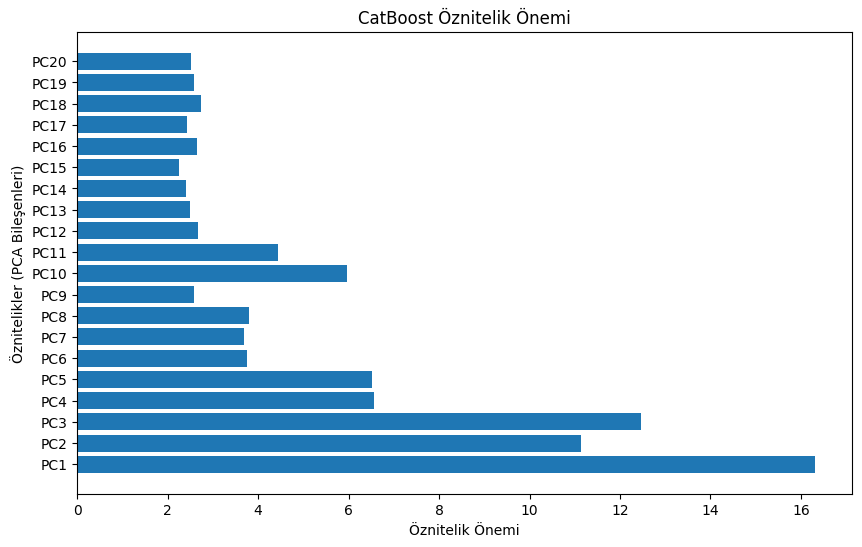

In [99]:
import matplotlib.pyplot as plt

feature_importance = best_catboost.get_feature_importance()
features = [f'PC{i+1}' for i in range(len(feature_importance))]

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Öznitelik Önemi")
plt.ylabel("Öznitelikler (PCA Bileşenleri)")
plt.title("CatBoost Öznitelik Önemi")
plt.show()

In [113]:
real_estate_df = fetch_data("real-estate")

real_estate_data = yf.download(real_estate_df['Symbol'].tolist(), start="2005-01-01", end="2025-01-01", interval="1mo")['Close']

real_estate_data.to_csv("realestate.csv")

print(real_estate_data.head())

[*********************100%***********************]  262 of 262 completed


Ticker      AAT       ABR  ACR  ACRE       ADC  AEI  AFCG  AGNC  AHH  AHR  \
Date                                                                        
2005-01-01  NaN  4.619186  NaN   NaN  9.194139  NaN   NaN   NaN  NaN  NaN   
2005-02-01  NaN  4.947423  NaN   NaN  8.732847  NaN   NaN   NaN  NaN  NaN   
2005-03-01  NaN  4.897950  NaN   NaN  8.583321  NaN   NaN   NaN  NaN  NaN   
2005-04-01  NaN  4.848474  NaN   NaN  8.799754  NaN   NaN   NaN  NaN  NaN   
2005-05-01  NaN  5.387751  NaN   NaN  9.314904  NaN   NaN   NaN  NaN  NaN   

Ticker      ...        VTR       WELL  WETH  WHLR       WPC  WSR         WY  \
Date        ...                                                               
2005-01-01  ...  11.600396  12.254507   NaN   NaN  9.168210  NaN  11.656383   
2005-02-01  ...  11.700090  12.771342   NaN   NaN  9.599654  NaN  12.502589   
2005-03-01  ...  11.310390  11.914956   NaN   NaN  8.620386  NaN  12.877890   
2005-04-01  ...  12.392832  12.473470   NaN   NaN  8.557714  NaN 

In [62]:
real_estate_data = pd.read_csv('realestate.csv', index_col=0, parse_dates=True)

In [79]:
null_ratio_real_estate = real_estate_data.isna().mean()
real_estate_data_clean = real_estate_data.loc[:, null_ratio_real_estate < 0.05] 

print(f"Orijinal şirket sayısı: {real_estate_data.shape[1]}")
print(f"Temizlendikten sonra şirket sayısı: {real_estate_data_clean.shape[1]}")

real_estate_stationary = make_stationary_all(real_estate_data_clean)

real_estate_data_filled = real_estate_stationary.interpolate(method='linear', limit_direction='both')

print("Real Estate verisi hazırlandı:", real_estate_data_filled.shape)

real_estate_tsfreshlong = real_estate_data_filled.reset_index()
real_estate_tsfreshlong = real_estate_tsfreshlong.melt(id_vars=["Date"], var_name="id", value_name="value")

from tsfresh import extract_features

real_estate_features_df = extract_features(
    real_estate_tsfreshlong,
    column_id="id",
    column_sort="Date",
    column_value="value",
    n_jobs=8
)
real_estate_features_df = real_estate_features_df[X_train.columns]
print("Real Estate için çıkarılan özellikler:", real_estate_features_df.shape)

Orijinal şirket sayısı: 262
Temizlendikten sonra şirket sayısı: 110
Real Estate verisi hazırlandı: (232, 110)


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 37/37 [00:13<00:00,  2.76it/s]


Real Estate için çıkarılan özellikler: (110, 50)


# Öncelikle eksik veriler temizlendi ve veriye log dönüşümü ile fark alma işlemi uygulanarak durağan hale getirildi. TSFresh kullanılarak zaman serisi öznitelikleri çıkarıldı ve diğer sektörlerden elde edilen özniteliklerle aynı formatta getirildi.

In [84]:
n_components = min(20, real_estate_features_df.shape[1]) 
real_estate_pca = PCA(n_components=n_components).fit_transform(real_estate_features_df)

# En iyi model ile tahmin yapıldı.
real_estate_pred = best_model.predict(real_estate_pca)

sector_counts = pd.Series(real_estate_pred).value_counts(normalize=True) * 100

print("Real Estate sektöründeki hisselerin benzerlik yüzdeleri:")
print(sector_counts)

Real Estate sektöründeki hisselerin benzerlik yüzdeleri:
healthcare    52.727273
technology    34.545455
financials    12.727273
Name: proportion, dtype: float64


# PCA uygulanarak boyut indirgeme yapıldı ve model bu verilere dayanarak hangi sektörle daha fazla benzeştiğini tahmin ettik.

# Sonuçlar hem yüzdelik olarak hem de grafiksel olarak görselleştirildi.

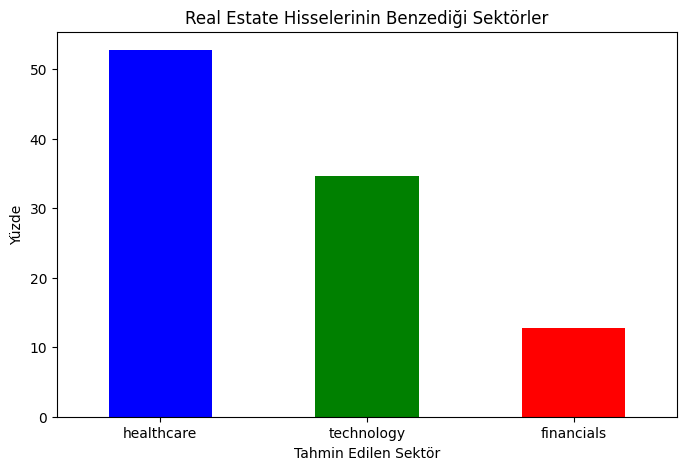

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sector_counts.plot(kind="bar", color=["blue", "green", "red"])
plt.xlabel("Tahmin Edilen Sektör")
plt.ylabel("Yüzde")
plt.title("Real Estate Hisselerinin Benzediği Sektörler")
plt.xticks(rotation=0)
plt.show()

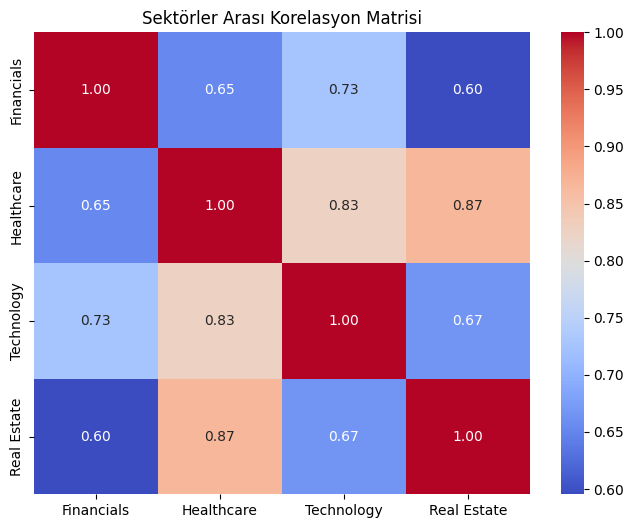

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sector_volatility = {
    "Financials": np.std(X_train_pca[y_train == "financials"], axis=0),
    "Healthcare": np.std(X_train_pca[y_train == "healthcare"], axis=0),
    "Technology": np.std(X_train_pca[y_train == "technology"], axis=0),
    "Real Estate": np.std(real_estate_pca, axis=0)
}

sector_matrix = pd.DataFrame(sector_volatility).corr()

plt.figure(figsize=(8,6))
sns.heatmap(sector_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sektörler Arası Korelasyon Matrisi")
plt.show()